In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz

In [3]:
data = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Ibrahim\Machine Learning\Final Exam\Life Expectancy Data.csv')
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [4]:
pd.set_option('display.max_columns',30)
data.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [5]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [6]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [7]:
for i in data [['Adult Mortality','Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 
                'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy ']]:
               data[i] = data[i].fillna(value=data[i].mean())


In [8]:
data.drop('Country',axis=1,inplace=True)

In [9]:
data.corr()['Life expectancy ']

Year                               0.169623
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
Population                        -0.019638
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

In [10]:
data.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [11]:
data.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [12]:
data = data[['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy ']]

In [13]:
data.Status.value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [14]:
data['Status']= np.where((data.Status == 'Developing'),1,0)


C:\Users\admin\AppData\Local\Temp\ipykernel_11280\2939383586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Status']= np.where((data.Status == 'Developing'),1,0)


In [15]:
data.corr()['Life expectancy ']

Year                               0.169623
Status                            -0.481962
Adult Mortality                   -0.696359
infant deaths                     -0.196535
Alcohol                            0.391598
percentage expenditure             0.381791
Hepatitis B                        0.203771
Measles                           -0.157574
 BMI                               0.559255
under-five deaths                 -0.222503
Polio                              0.461574
Total expenditure                  0.207981
Diphtheria                         0.475418
 HIV/AIDS                         -0.556457
GDP                                0.430493
 thinness  1-19 years             -0.472162
 thinness 5-9 years               -0.466629
Income composition of resources    0.692483
Schooling                          0.715066
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

In [16]:
variables = data[[ 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure',  'Measles ', ' BMI ',' HIV/AIDS',
       ' thinness 5-9 years']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,3.382877,Adult Mortality
1,1.737888,infant deaths
2,2.790226,Alcohol
3,1.343787,percentage expenditure
4,1.393889,Measles
5,3.104139,BMI
6,1.543402,HIV/AIDS
7,2.670679,thinness 5-9 years


In [17]:
data.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [18]:
data = data[['Adult Mortality', 'infant deaths', 'Alcohol','percentage expenditure','Measles ',
            ' BMI ',' HIV/AIDS',' thinness 5-9 years','Life expectancy ']]

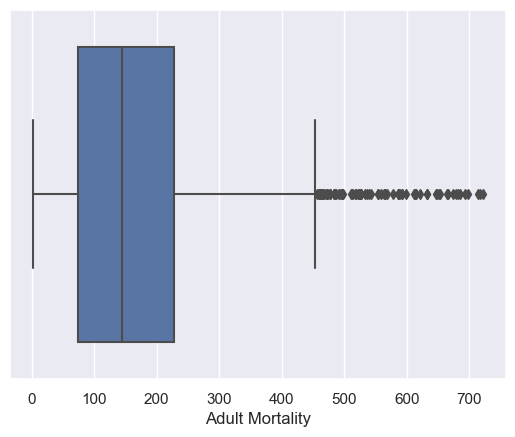

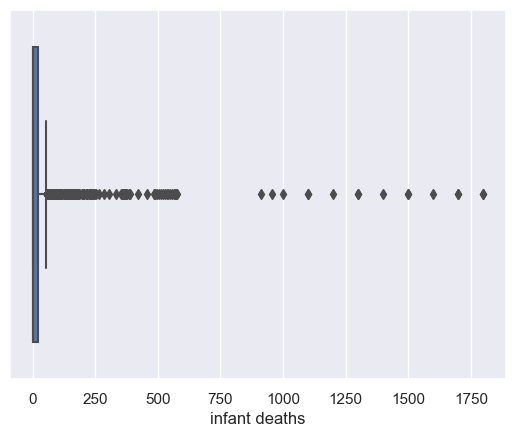

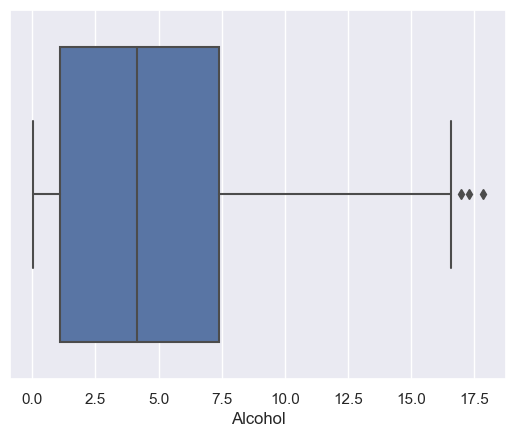

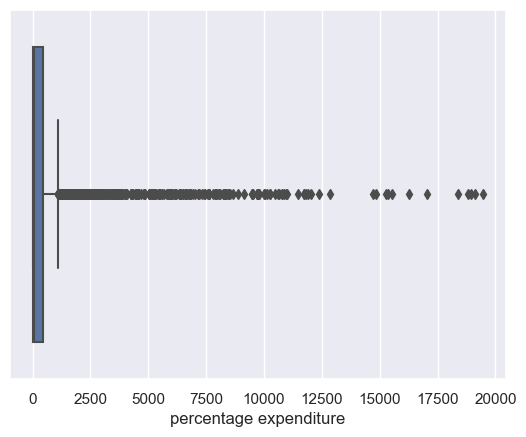

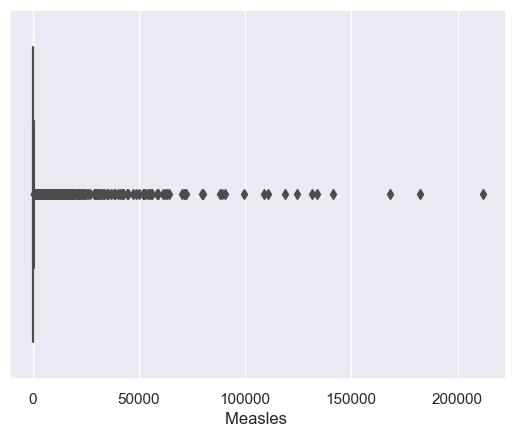

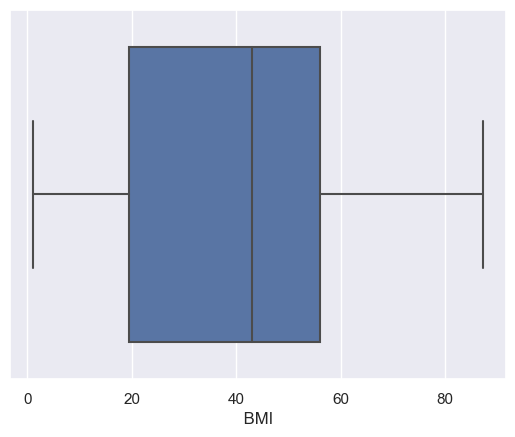

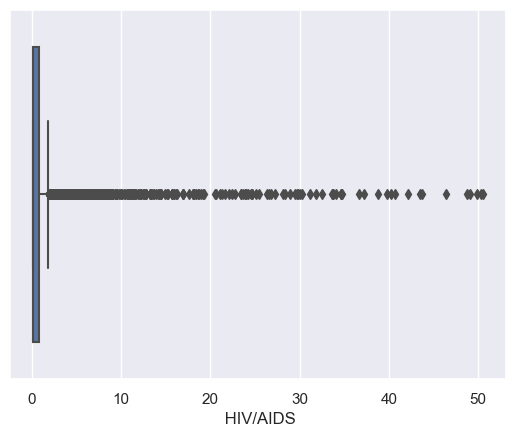

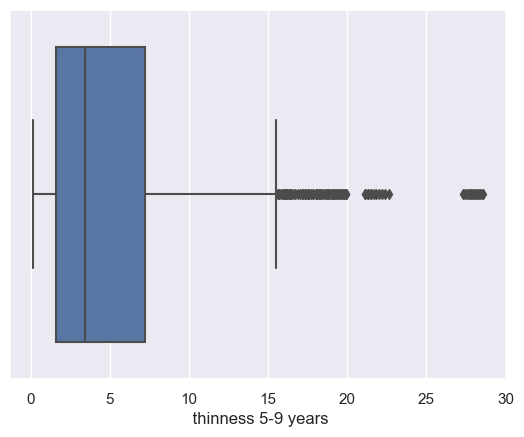

In [19]:
for i in data[['Adult Mortality', 'infant deaths', 'Alcohol','percentage expenditure','Measles ',
            ' BMI ',' HIV/AIDS',' thinness 5-9 years']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [20]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

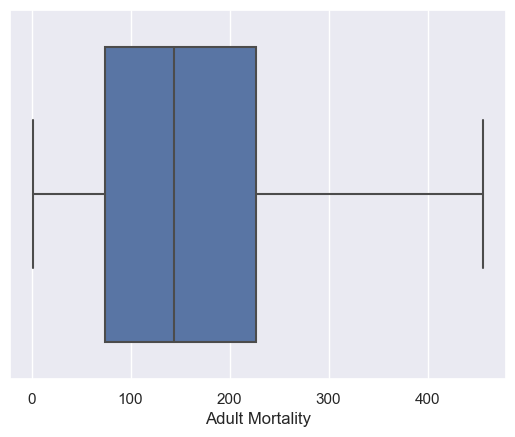

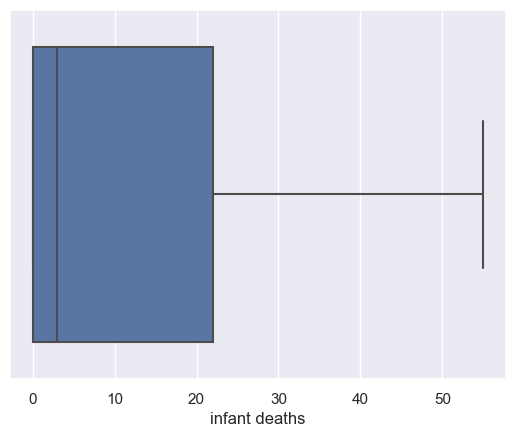

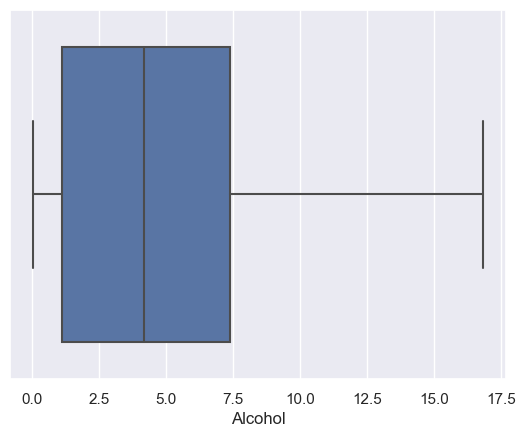

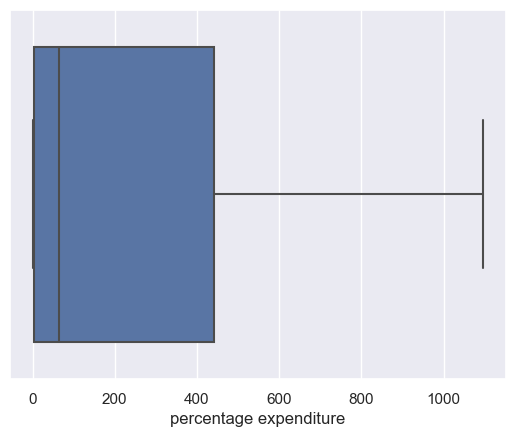

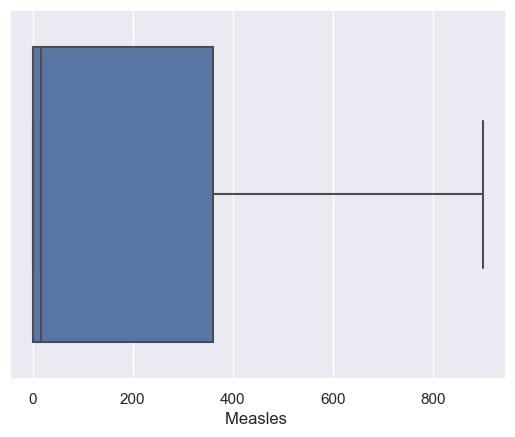

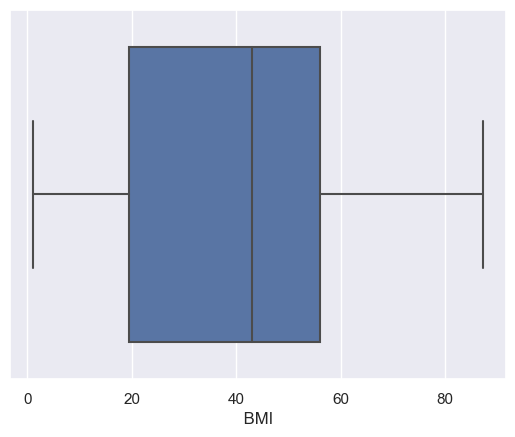

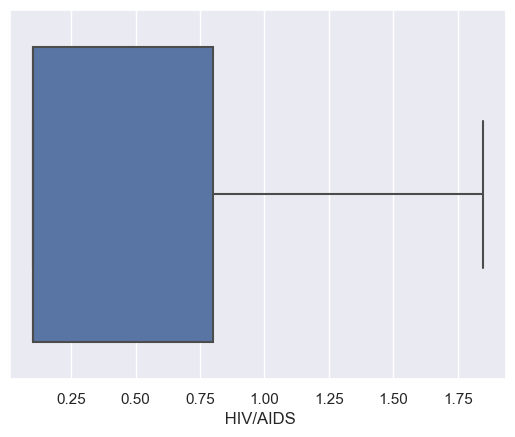

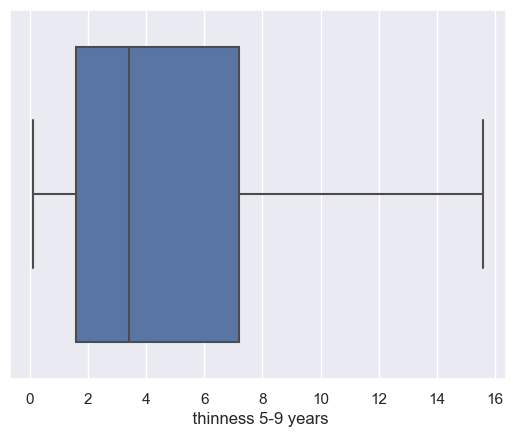

In [21]:
for i in variables.columns:
    variables[i] = np.where(variables[i] > Upper[i],Upper[i],variables[i])
    variables[i] = np.where(variables[i] < Lower[i],Lower[i],variables[i])
    sns.boxplot(data=variables,x=variables[i])
    plt.show()

In [22]:
data

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,HIV/AIDS,thinness 5-9 years,Life expectancy
0,263.0,62,0.01,71.279624,1154,19.1,0.1,17.3,65.0
1,271.0,64,0.01,73.523582,492,18.6,0.1,17.5,59.9
2,268.0,66,0.01,73.219243,430,18.1,0.1,17.7,59.9
3,272.0,69,0.01,78.184215,2787,17.6,0.1,18.0,59.5
4,275.0,71,0.01,7.097109,3013,17.2,0.1,18.2,59.2
...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,31,27.1,33.6,9.4,44.3
2934,715.0,26,4.06,0.000000,998,26.7,36.7,9.9,44.5
2935,73.0,25,4.43,0.000000,304,26.3,39.8,1.3,44.8
2936,686.0,25,1.72,0.000000,529,25.9,42.1,1.7,45.3


In [23]:
data.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles ', ' BMI ', ' HIV/AIDS', ' thinness 5-9 years',
       'Life expectancy '],
      dtype='object')

In [24]:
data['Life expectancy '].value_counts()

73.0    45
75.0    33
78.0    31
73.6    28
73.9    25
        ..
43.1     1
49.5     1
49.0     1
55.1     1
45.4     1
Name: Life expectancy , Length: 363, dtype: int64

In [25]:
x = data[[ 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Measles ', ' BMI ', ' HIV/AIDS', ' thinness 5-9 years']]
y = data[['Life expectancy ']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
data.isnull().sum()

Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Measles                   0
 BMI                      0
 HIV/AIDS                 0
 thinness 5-9 years       0
Life expectancy           0
dtype: int64

In [28]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [29]:
reg = LinearRegression()

In [30]:
reg.fit(X_train,y_train)

LinearRegression()

In [31]:
reg.intercept_

array([69.59663972])

In [32]:
reg.coef_

array([[-2.97584403e-02, -2.38235416e-03,  3.93548201e-01,
         6.63662977e-04, -5.55332167e-05,  1.01539600e-01,
        -5.02426505e-01, -9.44451935e-02]])

In [33]:
y_pred = reg.predict(X_test)

In [34]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 3.893093688024207
MSE is 29.07469617254847
RMSE is 5.3920957124803035
R2 score is 0.6888781529136268


In [35]:
import statsmodels.api as sm

In [36]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     836.2
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        14:09:54   Log-Likelihood:                -9038.3
No. Observations:                2938   AIC:                         1.809e+04
Df Residuals:                    2929   BIC:                         1.815e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69.3600      0.407    170.213      0.000      68.561      70.159
Adult Mortality           -0.0300      0.001    -30.474      0.000      -0.032      -0.028
infant deaths             -0.0022      0.001     -2.073      0.038      -0.004      -0.000
Alcohol                    0.3932      0.028     13.805      0.000       0.337       0.449
percentage expenditure     0.0007   5.31e-05     12.420      0.000       0.001       0.001
Measles                -4.826e-05   9.83e-06     -4.910      0.000   -6.75e-05    -2.9e-05
 BMI                       0.1054      0.006     17.335      0.000       0.093       0.117
 HIV/AIDS                 -0.4948      0.023    -21.874      0.000      -0.539      -0.450
 thinness 5-9 years       -0.1000      0.030     -3.309      0.001      -0.159      -0.041
==============================================================================
Omnibus:                      296.351   Durbin-Watson:                   0.720
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              624.536
Skew:                          -0.633   Prob(JB):                    2.42e-136
Kurtosis:                       4.870   Cond. No.                     4.93e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""